In [1]:
# Non Linear Relationship

# importiing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.datasets import load_boston


In [41]:
boston =  load_boston()
ds  = pd.DataFrame(boston.data, columns = boston.feature_names)
ds['MEDV'] = boston.target
ds.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [5]:
# Using decsion tree
from sklearn.tree import DecisionTreeRegressor


In [6]:
X = ds['LSTAT']

In [16]:
tree = DecisionTreeRegressor(max_depth = 5).fit(X.values.reshape(-1,1), ds['MEDV'])

In [17]:
sort_idx  = X.sort_values().index

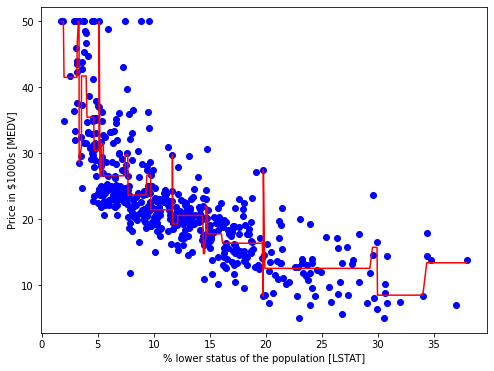

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X.sort_values(), ds['MEDV'].values[sort_idx], c='blue')
plt.plot(X[sort_idx], tree.predict(X[sort_idx].values.reshape(-1,1)), color='red')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()


In [23]:
# Another example is Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
X = ds.values
y = ds['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
forest = RandomForestRegressor(n_estimators=500,criterion='mse',n_jobs=-1 ,random_state=42)

In [30]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [32]:
y_train_pred  = forest.predict(X_train)
y_test_pred  = forest.predict(X_test)

In [33]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 0.009, test: 0.023


In [34]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 1.000, test: 1.000


In [35]:
# AdBoost
from sklearn.ensemble import AdaBoostRegressor


In [36]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42)

In [37]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=42)

In [38]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)


In [39]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 0.037, test: 0.064


In [40]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 1.000, test: 0.999
